## GTAA5(Global Tactical Asset Allocation 5)

- 레벨 : 초급
- 기대 연복리수익률 : 8~10%
- 포함 자산 : 5개 ETF
- 미국 주식 SPY, 국제 주식 EFA, 미국 중기국채 IEF, 원자재 DBC, 부동산 VNQ
- 매수 전략
- 각 ETF에 자산의 20%씩 투입(정적자산배분)
- 각 ETF의 가격이 10개월 이동평균보다 높으면 각 ETF 보유, 아니면 현금 보유(절대모멘텀)
- 따라서 각 달의 투자비중이 100%, 80%, 60%, 40%, 20% 또는 0%가 될 수 있음
- 매도 전략 : 월 1회 리밸런싱

In [1]:
import FinanceDataReader as fdr
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime, timedelta, date
import numpy as np
# pandas 표기 설정
pd.options.display.float_format = '{:.4f}'.format # 소수점 4자리까지 표기
pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다
# pd.set_option('display.max_rows', None) # Dataframe 출력시 컬럼 생략없이 전체 표기

### 팩터 불러오기

In [2]:
# 기간 설정
# 2007년 6월 1일 부터 모든 팩터 데이터 존재
start_date = datetime(1970, 1, 2)
end_date = datetime(2022, 12, 31)

In [3]:
# 종목의 종가 수집 함수
def get_price_data(stocks, start_date, end_date):
    df_price = pd.DataFrame(columns=stocks)
    for s in stocks:
        df_price[s] = pdr.DataReader(s, 'yahoo', start_date, end_date)['Close']
    
    return df_price

In [4]:
# 종목 설정
stocks = [['SPY', 0.20], ['EFA', 0.20], ['IEF', 0.20], ['DBC', 0.20], ['VNQ', 0.20]]

In [5]:
code = [s[0] for s in stocks]
ratio = [r[1] for r in stocks]
print(code)
print(ratio)

['SPY', 'EFA', 'IEF', 'DBC', 'VNQ']
[0.2, 0.2, 0.2, 0.2, 0.2]


In [6]:
df = get_price_data(code, start_date, end_date)
df = df.dropna()
df

,SPY,EFA,IEF,DBC,VNQ
Date,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600
...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000


### 수익률, CAGR 및 MDD 구하기

In [7]:
col_list = [col for col in code]
col_list_Profit = [col+'_Profit' for col in code]
col_list_Profit

['SPY_Profit', 'EFA_Profit', 'IEF_Profit', 'DBC_Profit', 'VNQ_Profit']

In [8]:
# 초기자산에 대한 리밸런싱(1년) 수익 구하기
money = 10000 # 초기 자산
df['Profit'] = money
for i in range(len(ratio)):
    df[col_list_Profit[i]] = money * ratio[i]
df

,SPY,EFA,IEF,DBC,VNQ,Profit,SPY_Profit,EFA_Profit,IEF_Profit,DBC_Profit,VNQ_Profit
Date,,,,,,,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000


In [9]:
avg = pd.DataFrame(columns=col_list)
avg

,SPY,EFA,IEF,DBC,VNQ


In [10]:
store = 0 # 보유할 자산
avg[col_list] = df[col_list].rolling(window=200).mean() # 10개월 이동평균

for i in range(1, len(df)):
    for j in range(0, len(col_list)): # 이번달 수익금
        df[col_list_Profit[j]].iloc[i] = df[col_list_Profit[j]].iloc[i - 1] * (
                    df[col_list[j]].iloc[i] / df[col_list[j]].iloc[i - 1])
    df['Profit'][i] = df[col_list_Profit].iloc[i].sum() + store

    if str(df.index[i].month) != str(df.index[i - 1].month) and (
    (df.index[i] - df.index[0]).days) / 30 >= 10:  # 1달 주기 리밸런싱(최소 10달은 보장)
        store = 0  # 보유할 자산
        goStop = [True, True, True, True, True]

        for j in range(0, len(col_list)):
            if df[col_list[j]].iloc[i] < avg[col_list[j]].iloc[i]:
                goStop[j] = False # 10개월 이동평균 보다 작으면 False

        money = df['Profit'][i]
        for j in range(0, len(col_list_Profit)):
            if goStop[j]:
                df[col_list_Profit[j]].iloc[i] = money * ratio[j]
            else:
                store += money * ratio[j]
                df[col_list_Profit[j]].iloc[i] = 0

In [11]:
df

,SPY,EFA,IEF,DBC,VNQ,Profit,SPY_Profit,EFA_Profit,IEF_Profit,DBC_Profit,VNQ_Profit
Date,,,,,,,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800,9891,1982.3066,1985.1828,1997.5884,1942.1487,1984.2718
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000,9898,2000.3160,1992.2692,1996.3825,1933.8842,1975.4639
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000,9928,1996.9985,1996.1347,1998.3118,1952.0661,1984.9008
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600,9888,2000.6319,1991.6251,1992.5239,1916.5289,1986.7882
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700,18063,0.0000,0.0000,0.0000,3700.0012,0.0000
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500,18081,0.0000,0.0000,0.0000,3616.2000,0.0000
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000,18163,0.0000,0.0000,0.0000,3698.6703,0.0000


In [12]:
df['Profit_P'] = df['Profit'].pct_change() # 수익률
df['Profit_PA'] = (1+df['Profit_P']).cumprod()-1 # 누적 수익률
df['Profit_LP'] = np.log(df['Profit_P']+1) # log 수익률
df['Profit_LPA'] = df['Profit_LP'].cumsum() # log 수익률

df[['Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA']] *= 100
df

,SPY,EFA,IEF,DBC,VNQ,Profit,SPY_Profit,EFA_Profit,IEF_Profit,DBC_Profit,VNQ_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA
Date,,,,,,,,,,,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,NaN,NaN,NaN,NaN
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800,9891,1982.3066,1985.1828,1997.5884,1942.1487,1984.2718,-1.0900,-1.0900,-1.0960,-1.0960
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000,9898,2000.3160,1992.2692,1996.3825,1933.8842,1975.4639,0.0708,-1.0200,0.0707,-1.0252
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000,9928,1996.9985,1996.1347,1998.3118,1952.0661,1984.9008,0.3031,-0.7200,0.3026,-0.7226
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600,9888,2000.6319,1991.6251,1992.5239,1916.5289,1986.7882,-0.4029,-1.1200,-0.4037,-1.1263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700,18063,0.0000,0.0000,0.0000,3700.0012,0.0000,-0.1382,80.6300,-0.1383,59.1281
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500,18081,0.0000,0.0000,0.0000,3616.2000,0.0000,0.0997,80.8100,0.0996,59.2277
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000,18163,0.0000,0.0000,0.0000,3698.6703,0.0000,0.4535,81.6300,0.4525,59.6801


In [13]:
# 복리수익률 계산 함수
def CAGR(first, last, periods):
    return ((last/first)**(1/periods)-1) * 100

In [14]:
df['CAGR'] = np.nan

fprice = df['Profit'][0]
df['CAGR'][0] = 0
idx = 0
years = 1
for row in range(1, len(df)):
    if str(df.index[row].year) != str(df.index[row-1].year):
        df['CAGR'][row] = CAGR(fprice, df['Profit'][row], years)
        idx = i
        years += 1
    else:
        df['CAGR'][row] = df['CAGR'][row-1]
df

,SPY,EFA,IEF,DBC,VNQ,Profit,SPY_Profit,EFA_Profit,IEF_Profit,DBC_Profit,VNQ_Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR
Date,,,,,,,,,,,,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800,10000,2000.0000,2000.0000,2000.0000,2000.0000,2000.0000,NaN,NaN,NaN,NaN,0.0000
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800,9891,1982.3066,1985.1828,1997.5884,1942.1487,1984.2718,-1.0900,-1.0900,-1.0960,-1.0960,0.0000
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000,9898,2000.3160,1992.2692,1996.3825,1933.8842,1975.4639,0.0708,-1.0200,0.0707,-1.0252,0.0000
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000,9928,1996.9985,1996.1347,1998.3118,1952.0661,1984.9008,0.3031,-0.7200,0.3026,-0.7226,0.0000
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600,9888,2000.6319,1991.6251,1992.5239,1916.5289,1986.7882,-0.4029,-1.1200,-0.4037,-1.1263,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700,18063,0.0000,0.0000,0.0000,3700.0012,0.0000,-0.1382,80.6300,-0.1383,59.1281,3.8343
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500,18081,0.0000,0.0000,0.0000,3616.2000,0.0000,0.0997,80.8100,0.0996,59.2277,3.8343
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000,18163,0.0000,0.0000,0.0000,3698.6703,0.0000,0.4535,81.6300,0.4525,59.6801,3.8343


In [15]:
# MDD 계산
window = 252
Roll_Max = df['Profit'].rolling(window, min_periods=1).max()
Daily_Drawdown = df['Profit']/ Roll_Max -1.0
Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
df['DD'] = Daily_Drawdown * 100
df['MDD'] = Max_Daily_Drawdown * 100

In [16]:
df = df[['SPY', 'EFA', 'IEF', 'DBC', 'VNQ', 'Profit', 'Profit_P', 'Profit_PA', 'Profit_LP', 'Profit_LPA', 'CAGR', 'DD', 'MDD']]
print(f"포트폴리오 최대 MDD: {df['MDD'].min():.2f}%")
df

포트폴리오 최대 MDD: -11.48%


,SPY,EFA,IEF,DBC,VNQ,Profit,Profit_P,Profit_PA,Profit_LP,Profit_LPA,CAGR,DD,MDD
Date,,,,,,,,,,,,,
2006-02-06,126.6000,62.0900,82.9300,24.2000,63.5800,10000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000
2006-02-07,125.4800,61.6300,82.8300,23.5000,63.0800,9891,-1.0900,-1.0900,-1.0960,-1.0960,0.0000,-1.0900,-1.0900
2006-02-08,126.6200,61.8500,82.7800,23.4000,62.8000,9898,0.0708,-1.0200,0.0707,-1.0252,0.0000,-1.0200,-1.0900
2006-02-09,126.4100,61.9700,82.8600,23.6200,63.1000,9928,0.3031,-0.7200,0.3026,-0.7226,0.0000,-0.7200,-1.0900
2006-02-10,126.6400,61.8300,82.6200,23.1900,63.1600,9888,-0.4029,-1.1200,-0.4037,-1.1263,0.0000,-1.1200,-1.1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,412.9300,70.0100,103.3200,28.8000,99.0700,18063,-0.1382,80.6300,-0.1383,59.1281,3.8343,-2.8505,-4.9457
2022-06-01,409.5900,69.2700,102.6100,28.9400,98.2500,18081,0.0997,80.8100,0.0996,59.2277,3.8343,-2.7537,-4.9457
2022-06-02,417.3900,70.7100,102.7600,29.6000,99.6000,18163,0.4535,81.6300,0.4525,59.6801,3.8343,-2.3127,-4.9457


### 데이터 시각화

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Date'>

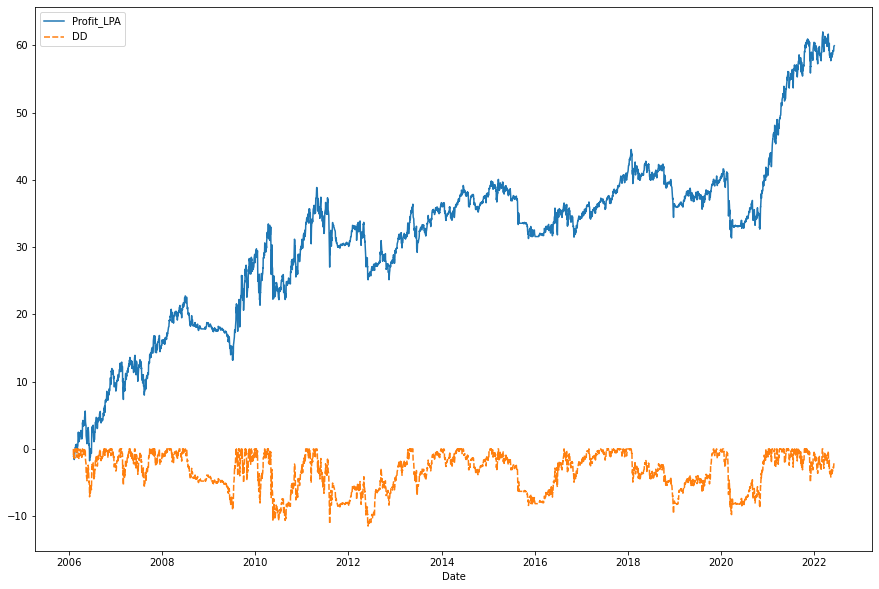

In [26]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['Profit_LPA', 'DD']])

<AxesSubplot:xlabel='Date'>

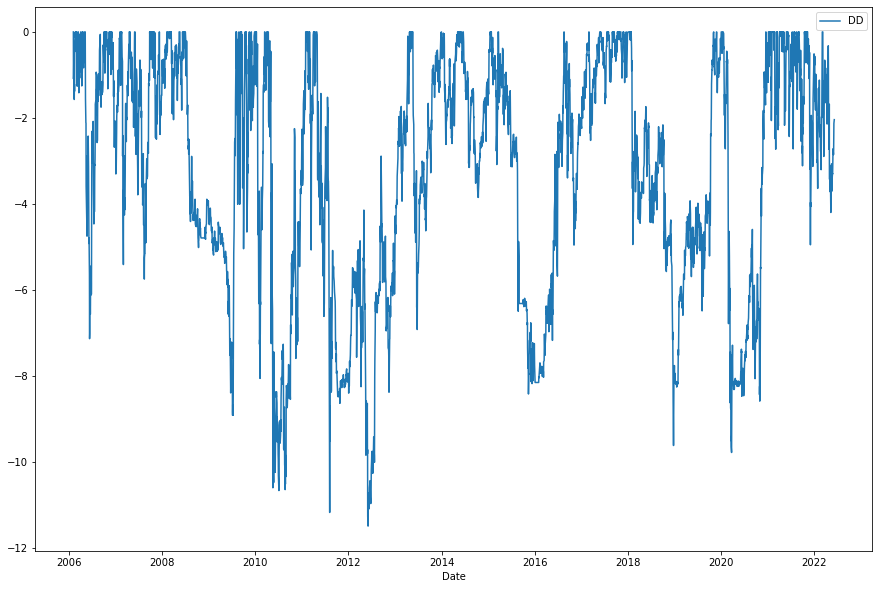

In [19]:
plt.figure(figsize=(15, 10))

sns.lineplot(data=df[['DD']])

## Historical Market Stress Periods 기능 Python Coding

In [20]:
stress_period = pd.DataFrame([['Oil Crisis', '1973-10-01', '1974-03-31'],
                             ['Black Monday Period', '1987-09-01', '1987-11-30'],
                             ['Asian Crisis', '1997-07-01', '1998-01-31'],
                             ['Russian Debt Default', '1998-07-01', '1998-01-31'],
                             ['Dotcom Crash', '2000-03-01', '2002-10-31'],
                             ['Subprime Crisis', '2007-11-01', '2009-03-31'],
                             ['COVID-19 Start', '2020-01-01', '2022-03-01']], 
                             columns=['Stress Period', 'Start', 'End'])
stress_period

,Stress Period,Start,End
0,Oil Crisis,1973-10-01,1974-03-31
1,Black Monday Period,1987-09-01,1987-11-30
2,Asian Crisis,1997-07-01,1998-01-31
3,Russian Debt Default,1998-07-01,1998-01-31
4,Dotcom Crash,2000-03-01,2002-10-31
5,Subprime Crisis,2007-11-01,2009-03-31
6,COVID-19 Start,2020-01-01,2022-03-01


In [21]:
stress_period['DD'] = np.nan
for i in range(len(stress_period)):
    stress_period['DD'][i] = df['DD'].loc[stress_period['Start'][i]:stress_period['End'][i]].min()
    stress_period['Start'][i] = str(stress_period['Start'][i])[:7] # '%Y-%m'
    stress_period['End'][i] = str(stress_period['End'][i])[:7]
stress_period = stress_period.dropna() # 결측치 제거
stress_period = stress_period.reset_index(drop=True)
stress_period

,Stress Period,Start,End,DD
0,Subprime Crisis,2007-11,2009-03,-5.1852
1,COVID-19 Start,2020-01,2022-03,-9.7712


## Drawdowns for Portfolio 1 기능 Python Coding

In [22]:
# Drawdown 0 교차점
day0 = []
for i in range(len(df)):
    if df['DD'][i] == 0:
        day0.append(df.index[i])
day0

[Timestamp('2006-02-06 00:00:00'),
 Timestamp('2006-02-22 00:00:00'),
 Timestamp('2006-02-24 00:00:00'),
 Timestamp('2006-03-02 00:00:00'),
 Timestamp('2006-03-14 00:00:00'),
 Timestamp('2006-03-15 00:00:00'),
 Timestamp('2006-03-16 00:00:00'),
 Timestamp('2006-03-17 00:00:00'),
 Timestamp('2006-04-05 00:00:00'),
 Timestamp('2006-04-06 00:00:00'),
 Timestamp('2006-04-18 00:00:00'),
 Timestamp('2006-04-19 00:00:00'),
 Timestamp('2006-04-21 00:00:00'),
 Timestamp('2006-05-05 00:00:00'),
 Timestamp('2006-05-08 00:00:00'),
 Timestamp('2006-05-09 00:00:00'),
 Timestamp('2006-05-10 00:00:00'),
 Timestamp('2006-10-04 00:00:00'),
 Timestamp('2006-10-05 00:00:00'),
 Timestamp('2006-10-09 00:00:00'),
 Timestamp('2006-10-13 00:00:00'),
 Timestamp('2006-10-16 00:00:00'),
 Timestamp('2006-10-19 00:00:00'),
 Timestamp('2006-10-23 00:00:00'),
 Timestamp('2006-10-24 00:00:00'),
 Timestamp('2006-10-25 00:00:00'),
 Timestamp('2006-10-26 00:00:00'),
 Timestamp('2006-11-14 00:00:00'),
 Timestamp('2006-11-

In [23]:
Portfolio = pd.DataFrame(
    columns=['Start', 'End', 'Length(day)', 'Recovery By', 'Recovery Time(day)', 'Underwater Period(day)', 'Drawdown'])

for i in range(1, len(day0)):
    Start = day0[i-1] # Drawdown 시작일
    pcost = df['Profit'].loc[Start] # Drawdown 시작일 자산
    UnderWaterEndDay = day0[i] # UnderWaterEnd Day

    dt = df.loc[Start:UnderWaterEndDay] # Drawdown 기간 dataframe
    
    t = df.loc[Start:]
    for j in range(1, len(t)):
        if t['Profit'][j] >= pcost: # Recovery day
            RecoveryBy = t.index[j]
            break
    
    UnderWaterPeriod = UnderWaterEndDay - Start # UnderWater Period
    
    dd = dt['DD'].min() # Drawdown
    if dd == 0.0:
        continue
    End = dt['DD'].idxmin() # Drawdown Date
    Length = End - Start # Drawdown days
    RecoveryTime = RecoveryBy - End # 회복하는데 걸린 시간
    
    temp = [str(Start)[:10], str(End)[:10], Length.days, str(RecoveryBy)[:10], RecoveryTime.days, UnderWaterPeriod.days, dd]
    Portfolio = Portfolio.append(pd.Series(temp, index=Portfolio.columns), ignore_index=True)

In [24]:
Portfolio = Portfolio.sort_values(by=['Drawdown'])
Portfolio = Portfolio.reset_index(drop=True)
Portfolio.index = Portfolio.index + 1
Portfolio.index.name = 'Rank'

In [25]:
# Drawdowns for Portfolio 1
Portfolio.head(10)

,Start,End,Length(day),Recovery By,Recovery Time(day),Underwater Period(day),Drawdown
Rank,,,,,,,
1,2011-04-29,2012-06-04,402,2014-06-19,745,727,-11.4813
2,2010-04-14,2010-07-06,83,2011-02-01,210,293,-10.6555
3,2020-01-17,2020-03-23,66,2020-12-17,269,335,-9.7712
4,2018-01-26,2018-12-24,332,2021-02-04,773,647,-9.6092
5,2008-07-02,2009-07-08,371,2009-09-10,64,398,-8.9080
6,2015-03-23,2015-11-13,235,2017-11-03,721,514,-8.4126
7,2010-01-11,2010-02-08,28,2010-03-16,36,64,-8.0499
8,2006-05-10,2006-06-13,34,2006-10-04,113,147,-7.1273
9,2013-05-21,2013-06-24,34,2013-12-30,189,223,-6.9145
